In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

figsize = (12, 10)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
rounding = 3

classifiers_name_map = {
    "freezed_autoencoder_classifier_80_10_10_0_r1vqsmci": "Frozen Autoencoder Classifier 80/10/10 Split",
    "denoising_autoencoder_classifier_80_10_10_0_vpf7kyht": "Denoising Autoencoder Classifier 80/10/10 Split",
    "autoencoder_classifier_80_10_10_0_efejtdh5": "Autoencoder Classifier 80/10/10 Split",
    "denoising_autoencoder_classifier_50_35_15_0_ft3ynadd": "Denoising Autoencoder Classifier 50/35/15 Split",
    "freezed_autoencoder_classifier_50_35_15_0_1z47n5ef": "Frozen Autoencoder Classifier 50/35/15 Split",
    "autoencoder_classifier_50_35_15_0_qz1j7pgu": "Autoencoder Classifier 50/35/15 Split",
    "convnext_50_50_0_v3uuhvfd": "ConvNeXt Classifier 50/50 Split",
    "convnext_80_20_0_a8hdc6y8": "ConvNeXt Classifier 80/20 Split",
}

split_80_20_classifier = [
    "Frozen Autoencoder Classifier 80/10/10 Split",
    "Denoising Autoencoder Classifier 80/10/10 Split",
    "Autoencoder Classifier 80/10/10 Split",
    "ConvNeXt Classifier 80/20 Split",
]

split_50_35_15_classifier = [
    "Denoising Autoencoder Classifier 50/35/15 Split",
    "Frozen Autoencoder Classifier 50/35/15 Split",
    "Autoencoder Classifier 50/35/15 Split",
    "ConvNeXt Classifier 50/50 Split",
]

rename_80_20_classifier = {
    "Frozen Autoencoder Classifier 80/10/10 Split": "Frozen Autoencoder Classifier",
    "Denoising Autoencoder Classifier 80/10/10 Split": "Denoising Autoencoder Classifier",
    "Autoencoder Classifier 80/10/10 Split": "Autoencoder Classifier",
    "ConvNeXt Classifier 80/20 Split": "ConvNeXt Classifier",
}

rename_50_35_15_classifier = {
    "Denoising Autoencoder Classifier 50/35/15 Split": "Denoising Autoencoder Classifier",
    "Frozen Autoencoder Classifier 50/35/15 Split": "Frozen Autoencoder Classifier",
    "Autoencoder Classifier 50/35/15 Split": "Autoencoder Classifier",
    "ConvNeXt Classifier 50/50 Split": "ConvNeXt Classifier",
}

autoencoders_name_map = {
    "vae_80_20_0_xnvmci01": "Variational Autoencoder (80/20 Split)",
    "denoising_autoencoder_50_50_0_721kcrwe": "Denoising Autoencoder (50/50 Split)",
    "denoising_autoencoder_80_20_0_6o2hmk2i": "Denoising Autoencoder (80/20 Split)",
    "autoencoder_50_50_0_oasm9olk": "Autoencoder (50/50 Split)",
    "autoencoder_80_20_0_mpmp5ljz": "Autoencoder (80/20 Split)",
}

autoencoder_color_map = {
    "Variational Autoencoder (80/20 Split)": "mediumpurple",
    "Denoising Autoencoder (50/50 Split)": "gold",
    "Denoising Autoencoder (80/20 Split)": "goldenrod",
    "Autoencoder (50/50 Split)": "sandybrown",
    "Autoencoder (80/20 Split)": "peru",
}

classifiers_80_20_color_map = {
    "Frozen Autoencoder Classifier": "skyblue",
    "Denoising Autoencoder Classifier": "deepskyblue",
    "Autoencoder Classifier": "dodgerblue",
    "ConvNeXt Classifier": "indianred",
}
classifiers_50_50_color_map = {
    "Denoising Autoencoder Classifier": "lightgreen",
    "Frozen Autoencoder Classifier": "limegreen",
    "Autoencoder Classifier": "forestgreen",
    "ConvNeXt Classifier": "lightcoral",
}

def plot_general_metrics(
    general_metrics: pd.DataFrame,
    type: str = "Test",
    metric: str = "Accuracy",
    palette: dict = classifiers_80_20_color_map,
    models: str = "Classifiers",
    split: str = "80/20",
) -> None:
    """
    Plot general metrics as a bar chart.

    This function creates a bar plot to compare different models based on a specified metric. Each bar represents
    a model, and the height of the bar indicates the metric's value.

    Parameters
    ----------
    general_metrics : pd.DataFrame
        A DataFrame containing the general metrics of models. It must include columns for the model names and the
        specified metric.
    type : str, optional
        The type of metric to plot (e.g., "Test", "Train"). This string is prepended to the `metric` parameter
        to select the correct column from `general_metrics`. Default is "Test".
    metric : str, optional
        The name of the metric to plot (e.g., "Accuracy", "Loss"). This string is used to select the correct
        column from `general_metrics`. Default is "Accuracy".

    Returns
    -------
    None
        This function does not return any value. It shows a plot.
    """
    plt.figure(figsize=figsize)
    sns.barplot(
        data=general_metrics,
        y=f"{type} {metric}",
        hue="Name",
        palette=palette,
        gap=0.1,
    )
    if models == "Classifiers":
        plt.xlabel("Models")
        plt.ylabel(metric)
        plt.legend(prop={"size": 12}, loc="lower right")
        # plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.0)
        plt.title(f"Comparison of Classifiers Models Based on Averaged {metric} (split {split})")
        plt.show()
    else:
        plt.xlabel("Autoencoder Models")
        plt.ylabel(metric)
        plt.legend(prop={"size": 12})
        # plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.0)
        plt.title(f"Comparison of Autoencoders Models Based on {metric}")
        plt.show()

# Read Data and giving readable names to models

In [161]:
classifiers_general_data = pd.read_csv("classifiers.csv").round(rounding)
classifiers_general_data.replace(classifiers_name_map, inplace=True)
autoencoders_general_data = pd.read_csv("autoencoders.csv").round(rounding)
autoencoders_general_data.replace(autoencoders_name_map, inplace=True)

# Removing unused columns

In [162]:
classifiers_general_data.drop(
    columns=[
        "Commit",
        "Created",
        "Runtime",
        "GitHub",
        "End Time",
        "ID",
        "Notes",
        "State",
        "Updated",
        "Tags",
        "dataset",
        "test_folder_dataset",
        "train_folder_dataset",
        "preset_indices",
        "epoch",
        "test/AbsoulteError",
        "train/AbsoulteError",
        "trainer/global_step",
        "val/AbsoulteError",
    ],
    inplace=True,
)

In [163]:
autoencoders_general_data.drop(
    columns=[
        "Commit",
        "Created",
        "Runtime",
        "GitHub",
        "End Time",
        "ID",
        "Notes",
        "Updated",
        "Tags",
        "dataset",
        "test_folder_dataset",
        "train_folder_dataset",
        "epoch",
        "trainer/global_step",
    ],
    inplace=True,
)

### Renaming Columns for better understanding and rounding values

In [164]:
classifiers_general_data = classifiers_general_data.rename(
    columns={
        "test/Accuracy": "Test Accuracy",
        "test/Precision": "Test Precision",
        "test/Recall": "Test Recall",
        "test/loss": "Test Loss",
        "val/Accuracy": "Validation Accuracy",
        "val/Precision": "Validation Precision",
        "val/Recall": "Validation Recall",
        "val/loss": "Validation Loss",
        "train/loss": "Training Loss",
        "train/Accuracy": "Training Accuracy",
        "train/Precision": "Training Precision",
        "train/Recall": "Training Recall",
        "test_size": "Test Size",
        "train_size": "Train Size",
    }
)

autoencoders_general_data = autoencoders_general_data.rename(
    columns={
        "test/AbsoulteError": "Test Absolute Error",
        "val/AbsoulteError": "Validation Absolute Error",
        "train/AbsoulteError": "Training Absolute Error",
        "test/loss": "Test Loss",
        "val/loss": "Validation Loss",
        "train/loss": "Training Loss",
        "test_size": "Test Size",
        "train_size": "Train Size",
    }
)


classifiers_training = classifiers_general_data[
    [
        "Name",
        "Test Size",
        "Train Size",
        "Training Accuracy",
        "Training Precision",
        "Training Recall",
        "Training Loss",
    ]
]


classifiers_test = classifiers_general_data[
    [
        "Name",
        "Test Size",
        "Train Size",
        "Test Accuracy",
        "Test Precision",
        "Test Recall",
        "Test Loss",
    ]
]


classifiers_val = classifiers_general_data[
    [
        "Name",
        "Test Size",
        "Train Size",
        "Validation Accuracy",
        "Validation Precision",
        "Validation Recall",
        "Validation Loss",
    ]
]

## Seeing the Data as a table

In [165]:
classifiers_test

,Name,Test Size,Train Size,Test Accuracy,Test Precision,Test Recall,Test Loss
0,Frozen Autoencoder Classifier 80/10/10 Split,0.5,0.5,0.227,0.089,0.078,2.796
1,Denoising Autoencoder Classifier 80/10/10 Split,0.5,0.5,0.864,0.797,0.814,0.530
2,Autoencoder Classifier 80/10/10 Split,0.5,0.5,0.867,0.806,0.829,0.519
3,Denoising Autoencoder Classifier 50/35/15 Split,0.3,0.7,0.944,0.929,0.919,0.200
4,Frozen Autoencoder Classifier 50/35/15 Split,0.3,0.7,0.275,0.116,0.088,2.621
5,Autoencoder Classifier 50/35/15 Split,0.3,0.7,0.958,0.942,0.945,0.154
6,ConvNeXt Classifier 50/50 Split,0.5,0.5,0.931,0.910,0.904,0.209
7,ConvNeXt Classifier 80/20 Split,0.2,0.8,0.998,0.997,0.997,0.007


In [166]:
autoencoders_general_data

,Name,Test Size,Train Size,Test Absolute Error,Test Loss,Training Absolute Error,Training Loss,Validation Absolute Error,Validation Loss
0,Variational Autoencoder (80/20 Split),0.2,0.8,0.474,67718.648,0.475,67896.547,0.474,67717.289
1,Denoising Autoencoder (50/50 Split),0.5,0.5,0.154,0.042,0.158,0.043,0.154,0.042
2,Denoising Autoencoder (80/20 Split),0.8,0.8,0.150,0.040,0.156,0.043,0.150,0.040
3,Autoencoder (50/50 Split),0.5,0.5,0.030,0.001,0.047,0.004,0.030,0.001
4,Autoencoder (80/20 Split),0.2,0.8,0.028,0.001,0.047,0.004,0.028,0.001


In [167]:
autoencoders_test = autoencoders_general_data[
    ["Name", "Test Size", "Train Size", "Test Absolute Error", "Test Loss"]
]
autoencoders_test

,Name,Test Size,Train Size,Test Absolute Error,Test Loss
0,Variational Autoencoder (80/20 Split),0.2,0.8,0.474,67718.648
1,Denoising Autoencoder (50/50 Split),0.5,0.5,0.154,0.042
2,Denoising Autoencoder (80/20 Split),0.8,0.8,0.150,0.040
3,Autoencoder (50/50 Split),0.5,0.5,0.030,0.001
4,Autoencoder (80/20 Split),0.2,0.8,0.028,0.001


# Visualizing the Data as a comparison between the models

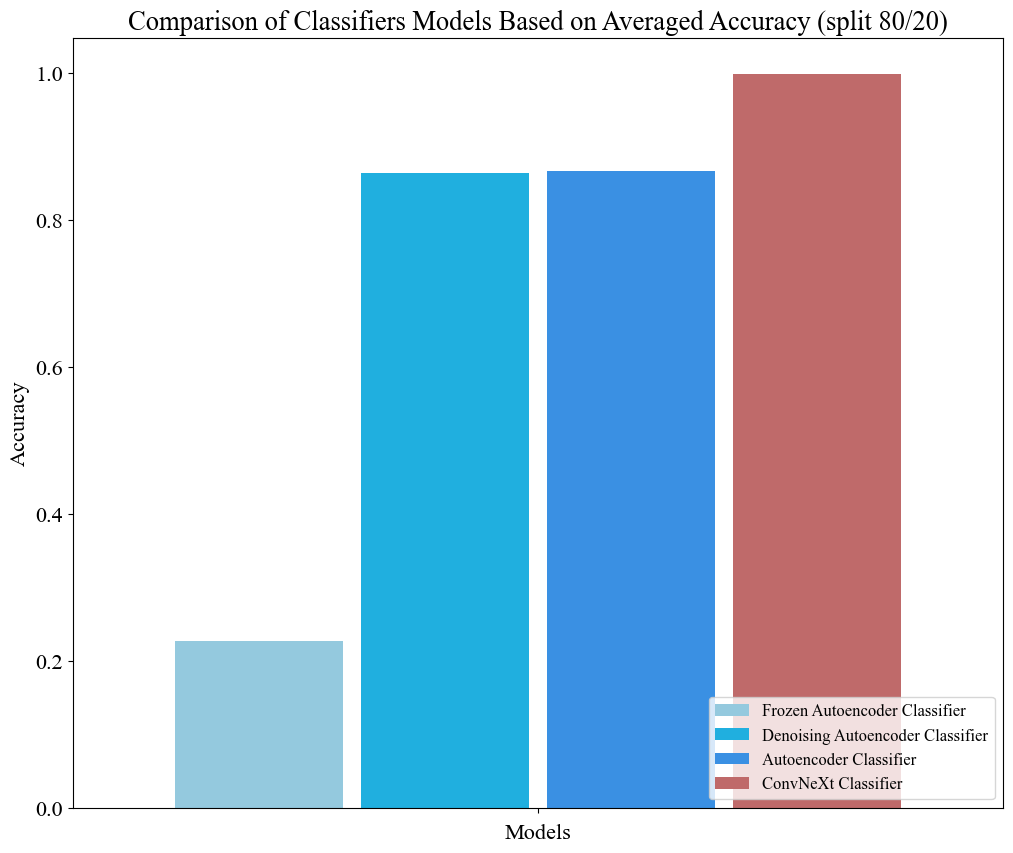

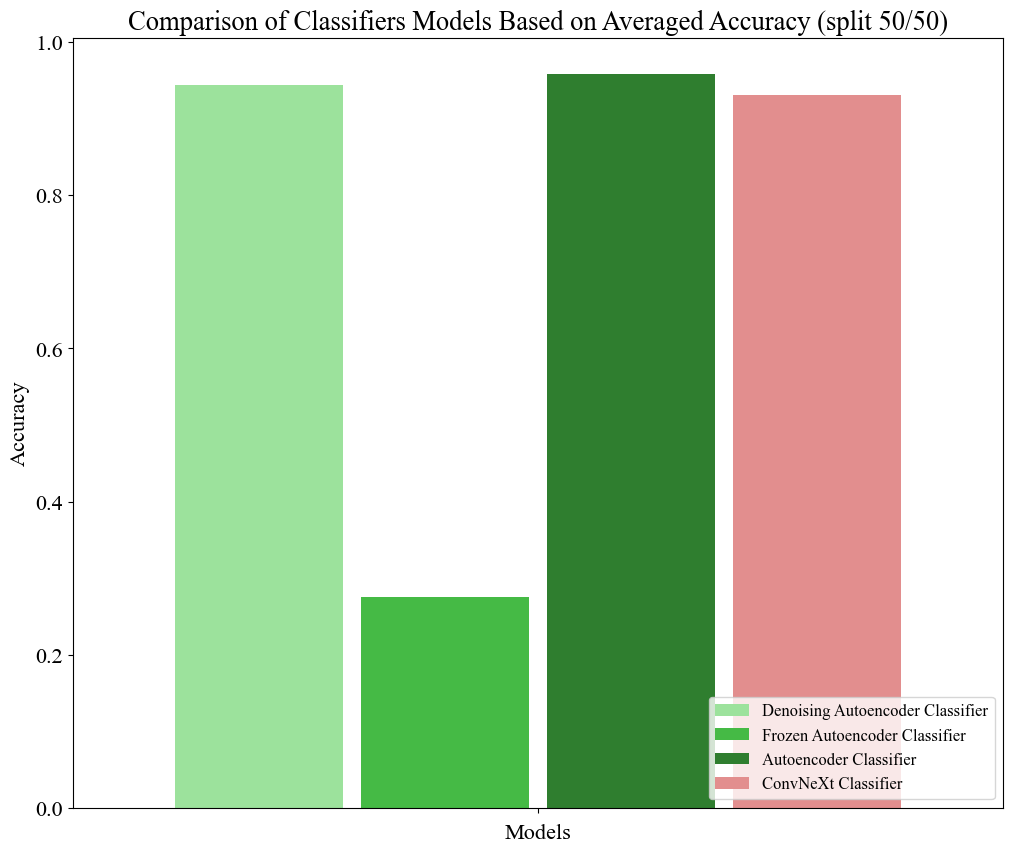

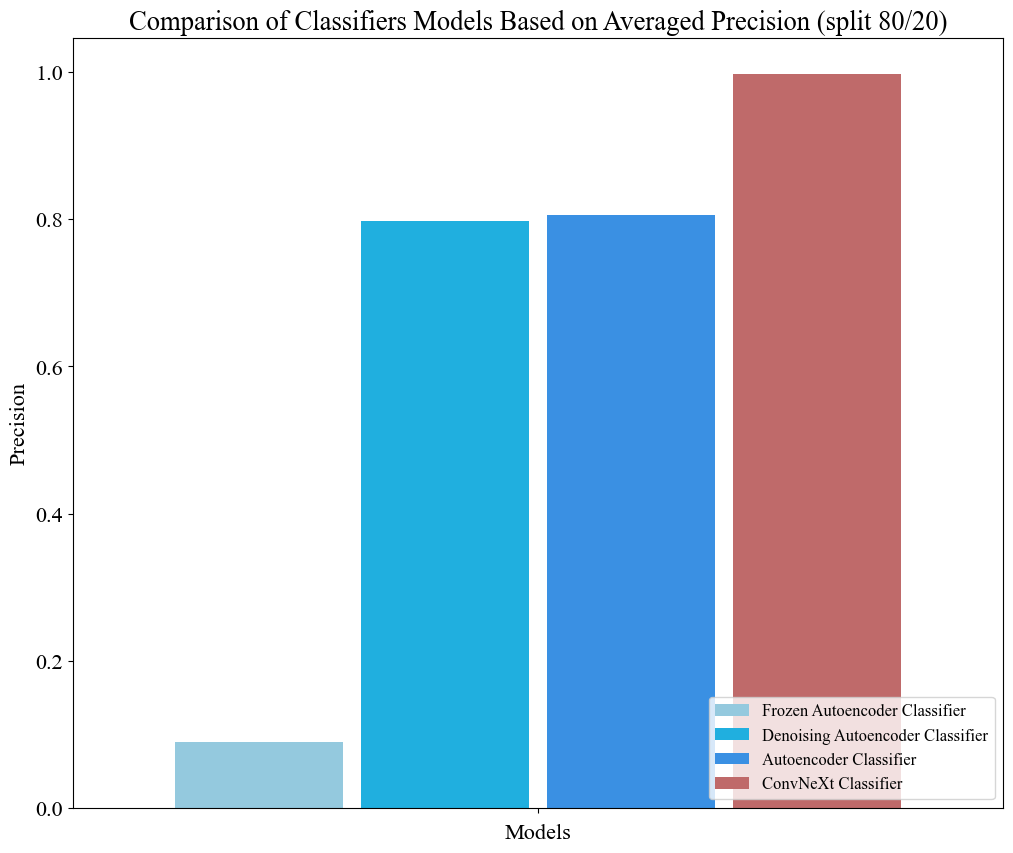

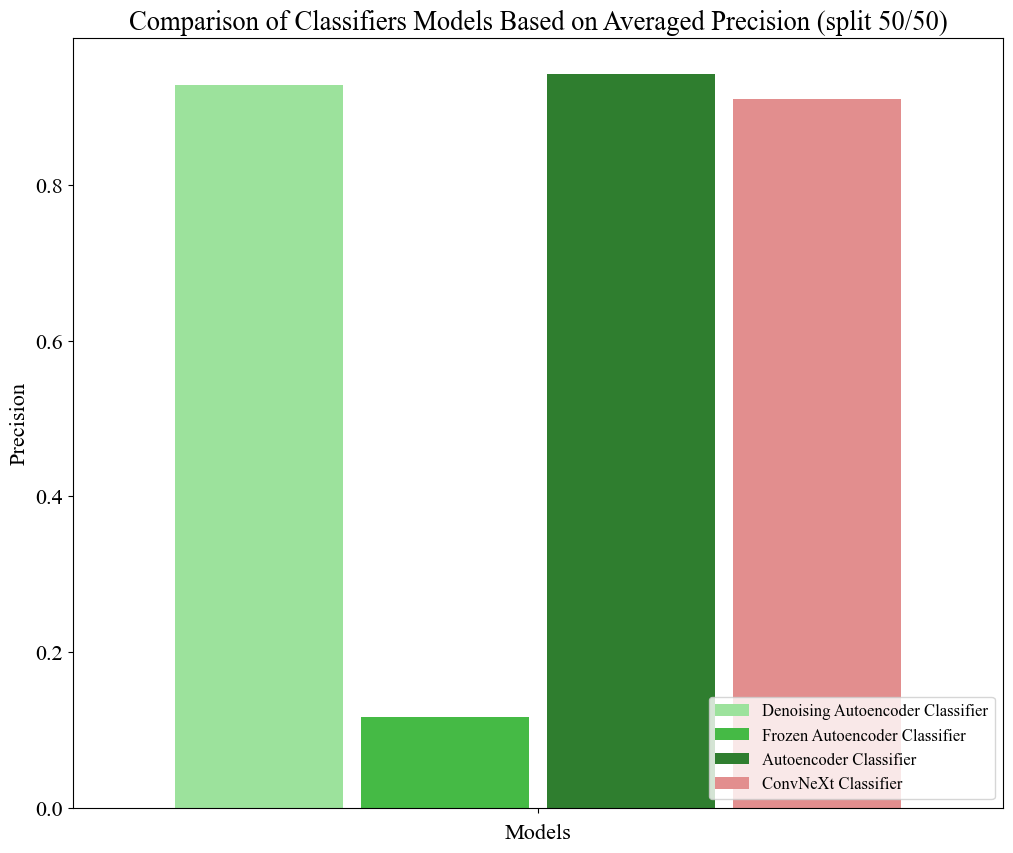

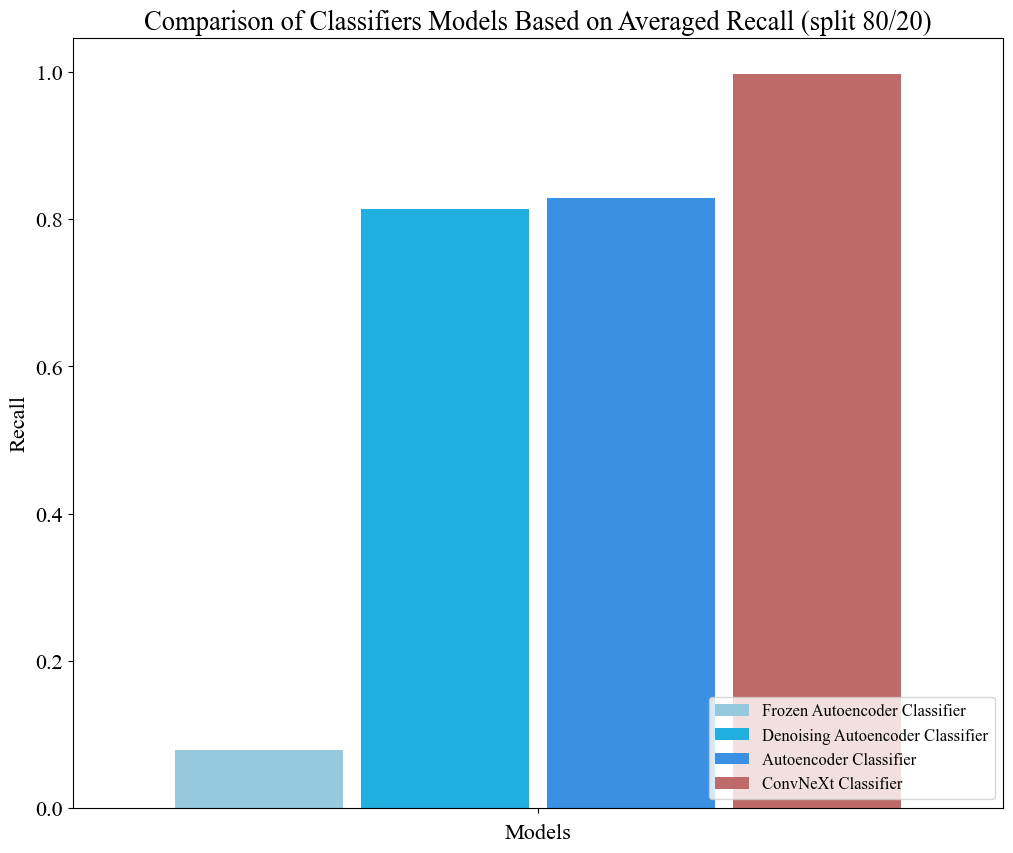

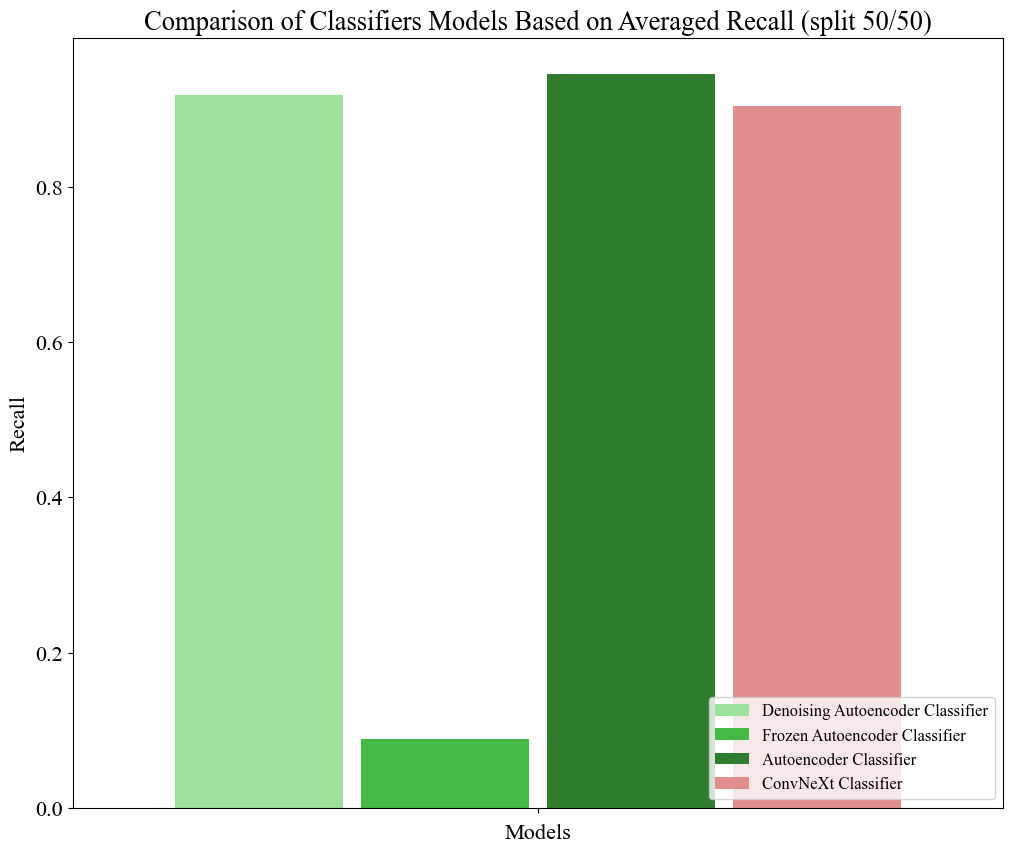

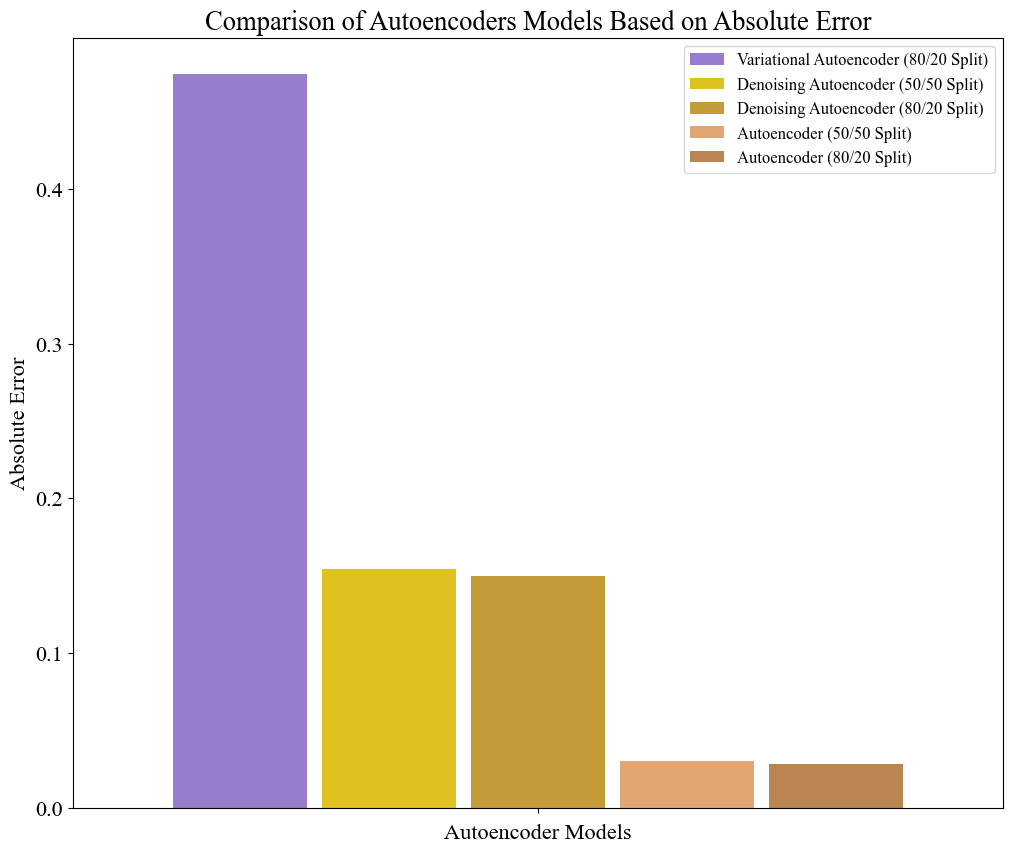

In [168]:
split_80_20 = classifiers_test.loc[
    classifiers_test["Name"].isin(split_80_20_classifier)
].replace(rename_80_20_classifier)
split_50_35_15 = classifiers_test.loc[
    classifiers_test["Name"].isin(split_50_35_15_classifier)
].replace(rename_50_35_15_classifier)

plot_general_metrics(split_80_20)
plot_general_metrics(split_50_35_15, palette=classifiers_50_50_color_map, split="50/50")

plot_general_metrics(split_80_20, metric="Precision")
plot_general_metrics(split_50_35_15, metric="Precision", palette=classifiers_50_50_color_map, split="50/50")

plot_general_metrics(split_80_20, metric="Recall")
plot_general_metrics(split_50_35_15, metric="Recall", palette=classifiers_50_50_color_map, split="50/50")


plot_general_metrics(

    autoencoders_general_data,

    metric="Absolute Error",

    palette=autoencoder_color_map,

    models="Autoencoders",
)

# Visualizing the per class metrics as tables

In [169]:
per_class_frozen_autoencoder_80_10_10 = pd.read_csv(
    "freezed_autoencoder_classifier_80_10_10_per_class_metrics.csv"
).round(rounding)
per_class_autoencoder_80_10_10 = pd.read_csv(
    "autoencoder_classifier_80_10_10_per_class_metrics.csv"
).round(rounding)
per_class_denoising_autoencoder_80_10_10 = pd.read_csv(
    "denoising_autoencoder_classifier_80_10_10_per_class_metrics.csv"
).round(rounding)
per_class_convnext_80_20 = pd.read_csv(
    "convnext_classifier_80_20_per_class_metrics.csv"
).round(rounding)

per_class_frozen_autoencoder_50_35_15 = pd.read_csv(
    "freezed_autoencoder_classifier_50_35_15_per_class_metrics.csv"
).round(rounding)
per_class_autoencoder_50_35_15 = pd.read_csv(
    "autoencoder_classifier_50_35_15_per_class_metrics.csv"
).round(rounding)
per_class_denoising_autoencoder_50_35_15 = pd.read_csv(
    "denoising_autoencoder_classifier_50_35_15_per_class_metrics.csv"
).round(rounding)
per_class_convnext_50_50 = pd.read_csv(
    "convnext_classifier_50_50_per_class_metrics.csv"
).round(rounding)

In [170]:
per_class_autoencoder_50_35_15

,Class,Accuracy,Precision,Recall
0,Tomato___Target_Spot,0.818,0.783,0.818
1,Tomato___Leaf_Mold,0.854,0.854,0.854
2,Strawberry___Leaf_scorch,0.981,0.944,0.981
3,Apple___Black_rot,0.963,0.945,0.963
4,Strawberry___healthy,0.903,1.000,0.903
5,Corn_(maize)___Common_rust_,0.925,0.984,0.925
6,Potato___Early_blight,0.971,1.000,0.971
7,Apple___healthy,0.908,0.896,0.908
8,Potato___healthy,0.927,0.957,0.927
9,Tomato___Early_blight,0.882,0.872,0.882


In [171]:
per_class_autoencoder_80_10_10

,Class,Accuracy,Precision,Recall
0,Tomato___Target_Spot,0.833,0.333,0.833
1,Tomato___Leaf_Mold,0.688,0.815,0.688
2,Strawberry___Leaf_scorch,0.828,0.667,0.828
3,Apple___Black_rot,0.848,0.757,0.848
4,Strawberry___healthy,0.812,0.703,0.812
5,Corn_(maize)___Common_rust_,0.805,0.786,0.805
6,Potato___Early_blight,0.857,0.800,0.857
7,Apple___healthy,0.795,0.608,0.795
8,Potato___healthy,0.570,0.790,0.570
9,Tomato___Early_blight,0.800,0.635,0.800


In [172]:
per_class_frozen_autoencoder_50_35_15

,Class,Accuracy,Precision,Recall
0,Tomato___Target_Spot,0.000,0.000,0.000
1,Tomato___Leaf_Mold,0.000,0.000,0.000
2,Strawberry___Leaf_scorch,0.000,0.000,0.000
3,Apple___Black_rot,0.000,0.000,0.000
4,Strawberry___healthy,0.000,0.000,0.000
5,Corn_(maize)___Common_rust_,0.000,0.000,0.000
6,Potato___Early_blight,0.000,0.000,0.000
7,Apple___healthy,0.000,0.000,0.000
8,Potato___healthy,0.000,0.000,0.000
9,Tomato___Early_blight,0.000,0.000,0.000


In [173]:
per_class_frozen_autoencoder_80_10_10

,Class,Accuracy,Precision,Recall
0,Tomato___Target_Spot,0.000,0.000,0.000
1,Tomato___Leaf_Mold,0.000,0.000,0.000
2,Strawberry___Leaf_scorch,0.000,0.000,0.000
3,Apple___Black_rot,0.000,0.000,0.000
4,Strawberry___healthy,0.000,0.000,0.000
5,Corn_(maize)___Common_rust_,0.000,0.000,0.000
6,Potato___Early_blight,0.000,0.000,0.000
7,Apple___healthy,0.000,0.000,0.000
8,Potato___healthy,0.000,0.000,0.000
9,Tomato___Early_blight,0.000,0.000,0.000


In [174]:
per_class_convnext_50_50

,Class,Accuracy,Precision,Recall
0,Tomato___Target_Spot,0.587,0.803,0.587
1,Tomato___Leaf_Mold,0.773,0.869,0.773
2,Strawberry___Leaf_scorch,0.989,0.961,0.989
3,Apple___Black_rot,0.987,0.800,0.987
4,Strawberry___healthy,0.829,0.941,0.829
5,Corn_(maize)___Common_rust_,0.927,0.900,0.927
6,Potato___Early_blight,0.952,0.961,0.952
7,Apple___healthy,0.695,0.844,0.695
8,Potato___healthy,0.878,0.955,0.878
9,Tomato___Early_blight,0.740,0.860,0.740


In [175]:
per_class_convnext_80_20

,Class,Accuracy,Precision,Recall
0,Tomato___Target_Spot,0.968,1.000,0.968
1,Tomato___Leaf_Mold,1.000,1.000,1.000
2,Strawberry___Leaf_scorch,1.000,1.000,1.000
3,Apple___Black_rot,1.000,1.000,1.000
4,Strawberry___healthy,1.000,1.000,1.000
5,Corn_(maize)___Common_rust_,1.000,1.000,1.000
6,Potato___Early_blight,1.000,1.000,1.000
7,Apple___healthy,0.990,0.922,0.990
8,Potato___healthy,0.992,1.000,0.992
9,Tomato___Early_blight,1.000,1.000,1.000


In [176]:
per_class_denoising_autoencoder_50_35_15

,Class,Accuracy,Precision,Recall
0,Tomato___Target_Spot,0.704,0.826,0.704
1,Tomato___Leaf_Mold,0.857,0.878,0.857
2,Strawberry___Leaf_scorch,0.881,0.963,0.881
3,Apple___Black_rot,0.893,0.909,0.893
4,Strawberry___healthy,0.862,0.893,0.862
5,Corn_(maize)___Common_rust_,0.984,0.968,0.984
6,Potato___Early_blight,1.000,0.985,1.000
7,Apple___healthy,0.718,0.961,0.718
8,Potato___healthy,0.926,0.946,0.926
9,Tomato___Early_blight,0.813,0.787,0.813


In [177]:
per_class_denoising_autoencoder_80_10_10

,Class,Accuracy,Precision,Recall
0,Tomato___Target_Spot,0.400,0.133,0.400
1,Tomato___Leaf_Mold,0.706,0.444,0.706
2,Strawberry___Leaf_scorch,0.674,0.806,0.674
3,Apple___Black_rot,0.968,0.811,0.968
4,Strawberry___healthy,0.680,0.919,0.680
5,Corn_(maize)___Common_rust_,0.721,0.738,0.721
6,Potato___Early_blight,0.820,0.911,0.820
7,Apple___healthy,0.725,0.725,0.725
8,Potato___healthy,0.929,0.629,0.929
9,Tomato___Early_blight,0.816,0.492,0.816
